In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [43]:
df = pd.read_csv("Data/train.csv")

In [44]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [45]:
df.shape

(404290, 6)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [47]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [48]:
df.dropna(inplace= True)

In [49]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

# Duplicate vs. Non-Duplicate Question Pairs Chart :
    The bar chart below shows the distribution of duplicate and non-duplicate question pairs:

    The X-axis represents the two possible labels:

    0 → Not Duplicate

    1 → Duplicate

    The Y-axis shows the number of question pairs in each category.

    This visualization helps us identify class imbalance, which is critical for modeling.

is_duplicate
0    255024
1    149263
Name: count, dtype: int64


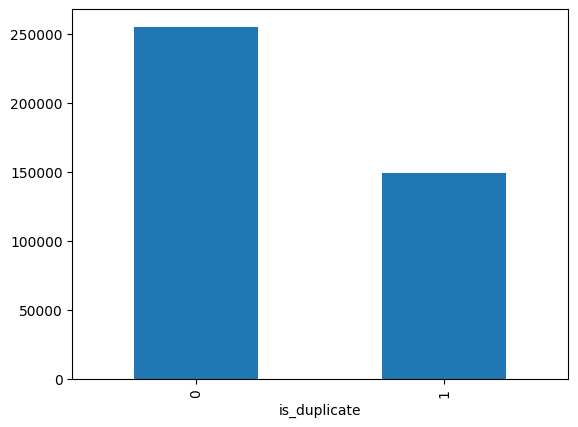

In [51]:
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')
plt.show()

# Unique vs Duplicate Question IDs : 
    The bar chart below shows the distribution of unique and duplicate question IDs across both qid1 and qid2 columns in the dataset.
    
    The X-axis shows two categories:

    'Unique Questions': Question IDs that appear at least once.

    'Duplicate Questions': Question IDs that appear multiple times (i.e., reused in more than one pair).

    The Y-axis represents the count of question IDs in each category.

number of unique questions :  537929
number of duplicate questions :  111778


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9684\1290309469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Unique Questions', 'Duplicate Questions'], y=[np.unique(qid).shape[0],x[x].shape[0] ], palette='pastel')


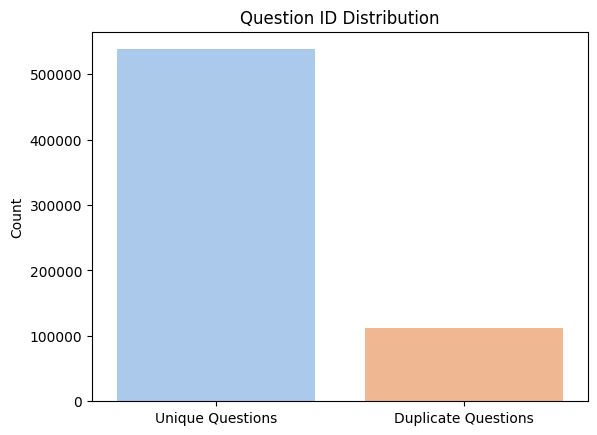

In [52]:
qid = pd.Series(df['qid1'].to_list() + df['qid2'].to_list())
print("number of unique questions : ",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("number of duplicate questions : ",x[x].shape[0])

sns.barplot(x=['Unique Questions', 'Duplicate Questions'], y=[np.unique(qid).shape[0],x[x].shape[0] ], palette='pastel')
plt.title("Question ID Distribution")
plt.ylabel("Count")
plt.show()

# Distribution of Question Frequencies :
The histogram below shows the frequency distribution of how many times each question ID appears in the dataset

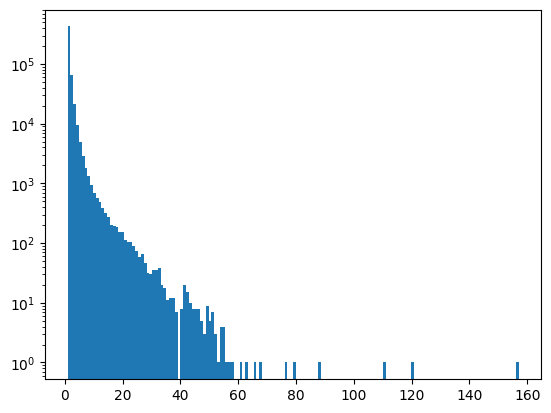

In [53]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Make Pickle File :
    pickle is a built-in Python module that allows you to save and load Python objects
    i.e. meaning we can store our preprocessed data and reuse it for furhter model training without recomputing it.

In [54]:
with open("Data/processed_df.pkl", "wb") as f:
    pickle.dump(df, f)
